## Basic Graphing with matplotlib
* Line graph
* Histogram
* Scatter plot

### Libraries we will be using 
* pep 8 (style guide for Python) suggests these should be in alphabetical order

In [65]:
import matplotlib.pyplot as plt
from math import exp,sqrt
import numpy as np
from numpy.random import normal
from scipy.stats import norm

### Initialization of variable for simulating security price

In [129]:
r = .0438
T = 1/252
sigma = .30
aapl = 232
prices = list()

### Simulation of one possible price path for an arbitrary quarter

In [77]:
for day in range(63):
    prices.append(aapl)
    aapl *= np.exp((r - .5 *sigma ** 2)*T + sigma * np.sqrt(T) * normal(0,1))

prices[:5]


[232,
 227.23986773363785,
 228.79948840113124,
 228.0905925138566,
 229.77954049131756]

### The plot method takes one or two variables and generates a line plot
* there are a long list of methods to augment and annotate your plots
* The semicolon surpresses entraneous output in the notebook setting 

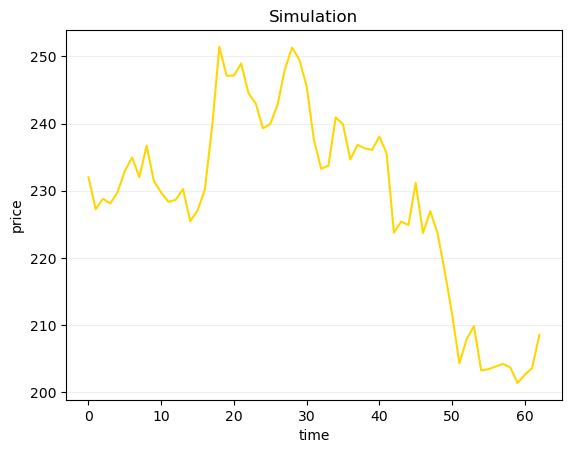

In [103]:
plt.grid(axis = 'y', alpha=.2)
plt.plot(prices, color = '#FFD700')
plt.xlabel("time")
plt.ylabel("price")
plt.title("Simulation");

### Simulation of 5000 possible paths
* reset the price variable before running

In [131]:
for path in range(5000):
    aapl = 232
    prices.append([])
    for day in range(63):
        prices[path].append(aapl)
        aapl *= np.exp((r - .5 *sigma ** 2)*T + sigma * np.sqrt(T) * normal(0,1))

len(prices[0])

63

### Plot the first 10 paths
* as you can see it is easy to plot many lines on the same graph
* everyt time you use `plt.` it effects the current plot

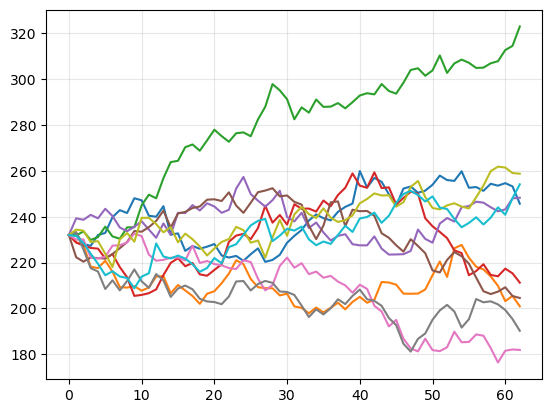

In [137]:
for line in range (10):
    plt.plot(prices[line])
plt.grid(alpha= .3)

### Peel off the last value in each path and store in a new variable

In [148]:
data = []
for row in range(5000):
    data.append(prices[row][-1])



### Let's make a histogram of each path's ending price!
* plot data
* overlay a theoretical normal curve based on scipy normal model to see how the data fits
* Since a stocks price in the future generally reflects a lognormal ditribution, the overlay is more open-ended on the left

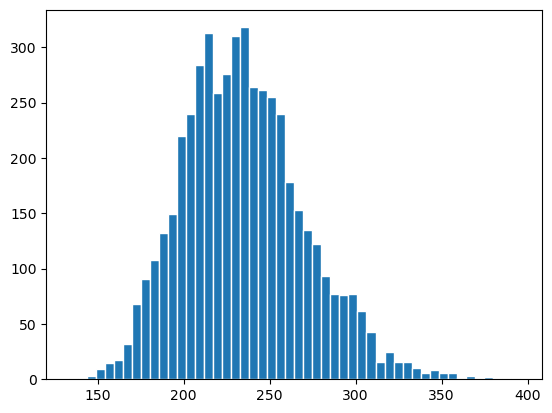

In [170]:
plt.hist(data, bins=50, edgecolor='w');

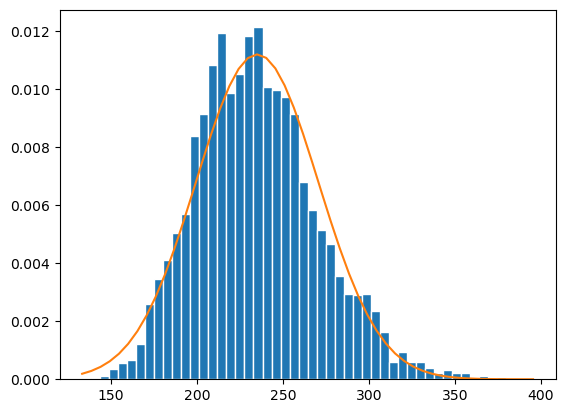

In [181]:
plt.hist(data, bins=50, density = True, edgecolor='w');
x = np.linspace(min(data),max(data))
mean, std = norm.fit(data)
pdf = norm.pdf(x, mean, std)
plt.plot(x,pdf);

### Using Seaborn to generate a simple histogram
* the kde (kernel density estimate) is not quite the thing as the previous normal overlay

<Axes: ylabel='Count'>

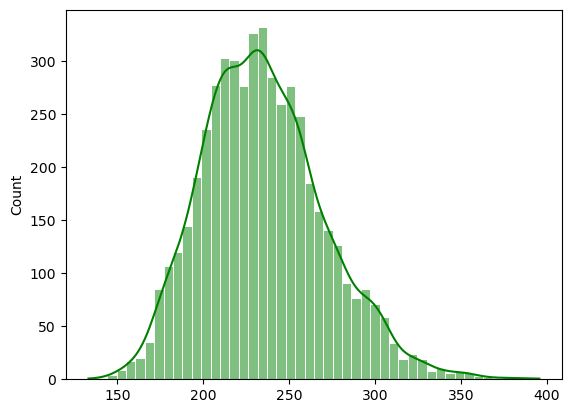

In [187]:
import seaborn as sb
sb.histplot(data, kde=True, edgecolor = 'w', color = 'green')

### Scatter Plots

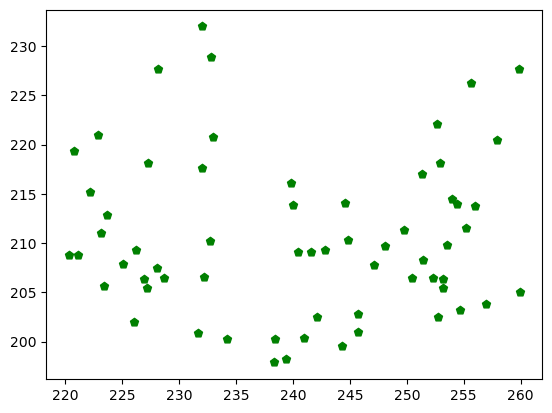

In [213]:
plt.scatter(prices[0], prices[1], marker ='p', color = 'g');

### Using NumPy to fit a simple regression model 

In [217]:
ols = np.polyfit(prices[0], prices[1], deg = 1)

### Assign the output of the model to appropriate variables

In [223]:
slope, intercept = ols
x = np.array(prices[0])
y = np.array(prices[1])


### Plot the original data and least squares (regression) line 

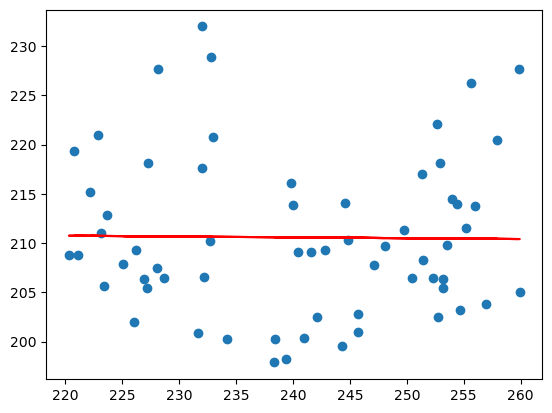

In [227]:
plt.scatter(x,y)
plt.plot(x,intercept + x * slope, color = 'r');

### When generating random numbers it is sometime preferable to generate a constant stream
* This can be done by creating a default generator 
* Often this is referred to as the random seed

In [231]:
rng = np.random.default_rng(3)
rng.normal(10)

12.040919121385183

### There is a so-called object-oriented method of using matplotlib
* This involves assigning variables for two matplotlib objects
* These variables are commonly called fig and ax or axes
* This methodology may allow greater control over your output
* There are syntactic differences when using this method

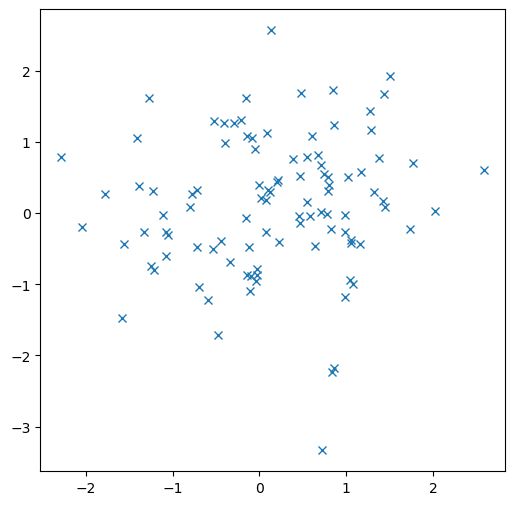

In [239]:
fig, ax = plt.subplots(figsize=(6,6))

x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y, 'x');

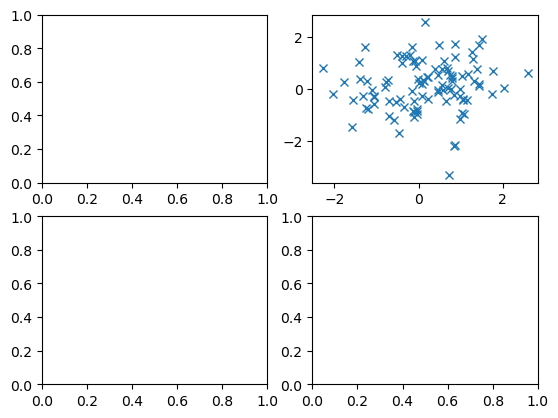

In [245]:
fig, axes = plt.subplots(2,2)
axes[0,1].plot(x,y, 'x')

### Your work can be saved out to typical image formats (.png, .jpg)

### Testing User class ###

In [1]:
### Look at notes from class 

ModuleNotFoundError: No module named 'python_files'